In [2]:
import pandas as pd
import numpy as np
import zipfile
import re
from datetime import datetime

In [3]:
!pip3 install spacy

In [4]:
import pathlib
pathlib.Path().absolute()

PosixPath('/content')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science Lab/dataset_v2/republican_tweets_v2.csv', index_col=0)
dataset.head()
# for term in dataset:
#   print(term)
# print(dataset["Text"])
allText=[]
for tweet in dataset["text"]:
  print(tweet)
  allText.append(tweet)
#print(allText)

Attention, @realDonaldTrump @KerriKupecDOJ https://t.co/NIVDINVVix
ICYMI Arizona State Treasurer @KimberlyYeeAZ wrote an OP-ED highlighting why she supports President @realDonaldTrump and his #AmericaFirst agenda ⤵️ https://t.co/Ccqx0YUQ5j
Today, President @realDonaldTrump is welcoming the President of Mexico to the White House to celebrate the historic USMCA trade deal.
 
Meanwhile, Joe Biden has supported failed trade deals like the TPP and NAFTA that have put the interests of other countries first.
“We will work every single day to restore public safety, protect our nation’s children, and bring violent perpetuators to justice.” -@realDonaldTrump https://t.co/9ZtRibANQS
Report: Trump Wasn’t Briefed On Unverified Russian Bounty Intel, But Adam Schiff Was https://t.co/Zf92ZK7IRA
@WhiteHouse @realDonaldTrump https://t.co/iBh3kyrgKW
@realDonaldTrump https://t.co/iBh3kyrgKW
Joe Biden shipped millions of jobs to China and pallets of cash to Iran. https://t.co/U4FPOBDxGP
The Joe Biden-Berni

In [7]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset[['text','word_count']].head()
dataset.word_count.describe()

count    1121.000000
mean       20.013381
std         9.575583
min         1.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        60.000000
Name: word_count, dtype: float64

In [8]:
freq = pd.Series(' '.join(dataset['text']).split()).value_counts()[:20]
freq

the                 691
RT                  573
to                  543
Biden               328
and                 328
a                   326
of                  320
in                  289
Trump               270
for                 234
Joe                 230
is                  220
President           199
on                  171
@realDonaldTrump    130
with                105
The                 100
that                 96
his                  93
has                  86
dtype: int64

In [10]:
import nltk
#nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
stemming: invers
lemmatization: inversely


In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [115]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["RT","SCREEN_NAME", "rt", "http", "https", "co", 'amp', 'like', 'want', 'get', 'know', 'country', 'would', 'make', 'going', 'one', 'year', 'day', 'time', 'realmattcouch', 'check', 'new', 'vice president', 'teamtrump', 'say', 'said', 'show', 'trumpwarroom', 'via', 'text', 'thank']
stop_words = stop_words.union(new_words)

In [116]:
corpus1 = []
for tweet in dataset['text']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', tweet)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus1.append(text)

In [124]:
corpus2 = []
check_repeated_tweet = False
for text in corpus1:
  new_text = text.replace('realdonaldtrump', 'donald trump')
  final = new_text.replace('joebiden', 'joe biden')
  #final = final.replace('donald trump', 'president trump')
  final = final.replace('president trump', 'donald trump')
  final = final.replace('donald j trump', 'donald trump')
  final = final.replace('kamalaharris', 'kamala harris')
  final = final.replace('coronavirus', 'COVID 19')
  final = final.replace('corona', 'COVID 19')
  final = final.replace('covid', 'COVID 19')
  final = final.replace('rona', 'COVID 19')
  final = final.replace('trump trump', 'trump')
  #final = final.replace('president trump', 'trump')
  final = final.replace('united state', '')
  final = final.replace('white house', '')
  final = final.replace('nobel peace prize', 'nobel prize')
  final = final.replace('president elect', '')
  final = final.replace('affordable care act', 'care act')
  final = final.replace('voting', 'vote')
  final = final.replace('votes', 'vote')
  final = final.replace('voted', 'vote')
  final = final.replace('mike penny', 'mike pence')
  final = final.replace('biden president', 'president biden')
  final = final.replace('vice president penny', 'mike pence')
  final = final.replace('vice president', '')
  final = final.replace('president donald trump', 'donald trump')
  final = final.replace('president donald j trump', 'donald trump')
  final = final.replace('amy coney barrett', 'amy barrett')
  if 'trump know world war ended' in text:
    if check_repeated_tweet:
      final = 'drop'
    else:
      check_repeated_tweet = True
  corpus2.append(final)

In [125]:
corpus = []
for text in corpus2:
  if text != 'drop':
    corpus.append(text)

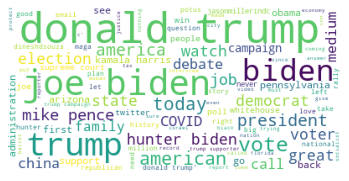

In [126]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)
list(cv.vocabulary_.keys())[:10]

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['president', 'screen_name', 'vice'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['attention',
 'donald',
 'trump',
 'nivdinvvix',
 'donald trump',
 'trump kerrikupecdoj',
 'trump kerrikupecdoj nivdinvvix',
 'icymi',
 'arizona',
 'state']

[Text(0, 0, 'trump'),
 Text(0, 0, 'biden'),
 Text(0, 0, 'donald'),
 Text(0, 0, 'joe'),
 Text(0, 0, 'american'),
 Text(0, 0, 'vote'),
 Text(0, 0, 'hunter'),
 Text(0, 0, 'america'),
 Text(0, 0, 'today'),
 Text(0, 0, 'president'),
 Text(0, 0, 'job'),
 Text(0, 0, 'campaign'),
 Text(0, 0, 'mike'),
 Text(0, 0, 'pence'),
 Text(0, 0, 'say'),
 Text(0, 0, 'watch'),
 Text(0, 0, 'democrat'),
 Text(0, 0, 'voter'),
 Text(0, 0, 'first'),
 Text(0, 0, 'election')]

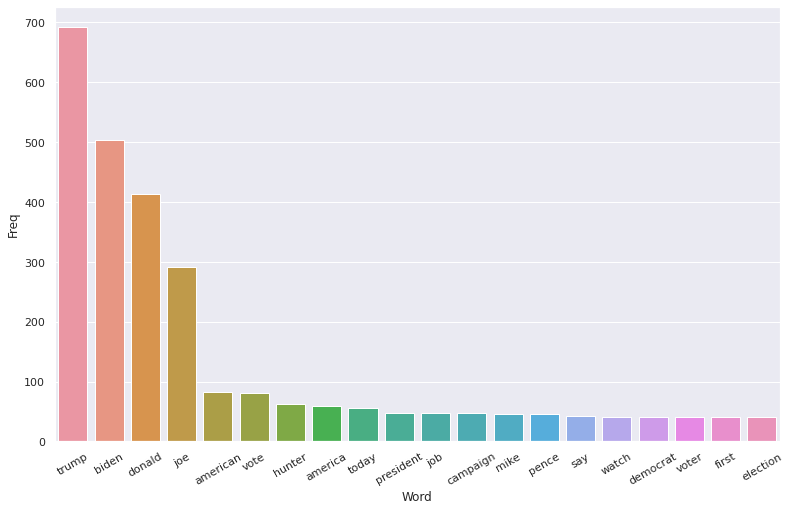

In [128]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0           donald trump   413
1              joe biden   266
2             mike pence    45
3           hunter biden    39
4               covid 19    38
5          kamala harris    26
6          supreme court    24
7        trump supporter    17
8        american people    14
9         trump campaign    14
10            trump maga    10
11        biden campaign     9
12  trump administration     9
13           obama biden     9
14            sleepy joe     9
15             left wing     8
16          biden kamala     8
17            peace deal     8
18           amy barrett     8
19           biden email     8


[Text(0, 0, 'donald trump'),
 Text(0, 0, 'joe biden'),
 Text(0, 0, 'mike pence'),
 Text(0, 0, 'hunter biden'),
 Text(0, 0, 'covid 19'),
 Text(0, 0, 'kamala harris'),
 Text(0, 0, 'supreme court'),
 Text(0, 0, 'trump supporter'),
 Text(0, 0, 'american people'),
 Text(0, 0, 'trump campaign'),
 Text(0, 0, 'trump maga'),
 Text(0, 0, 'biden campaign'),
 Text(0, 0, 'trump administration'),
 Text(0, 0, 'obama biden'),
 Text(0, 0, 'sleepy joe'),
 Text(0, 0, 'left wing'),
 Text(0, 0, 'biden kamala'),
 Text(0, 0, 'peace deal'),
 Text(0, 0, 'amy barrett'),
 Text(0, 0, 'biden email')]

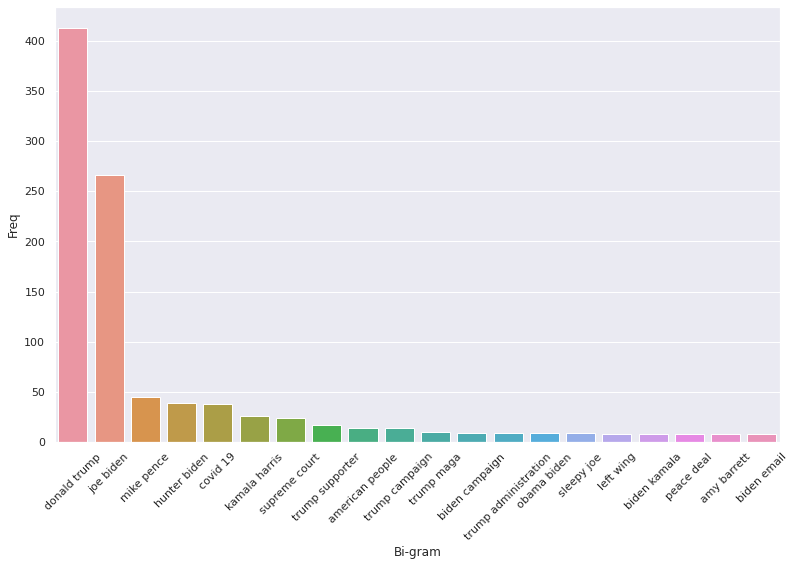

In [129]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [130]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
# doc=corpus[532]
doc=""
for line in corpus:
  doc= doc + str(line)
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [131]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,30)
# now print the results
print("\nText:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Text:
attention donald trump kerrikupecdoj nivdinvvixicymi arizona state treasurer kimberlyyeeaz wrote op ed highlighting support donald trump americafirst agenda ccqx yuq jtoday donald trump welcoming president mexico  celebrate historic usmca trade deal meanwhile joe biden supported failed trade deal tpp nafta put interest country firstwork every single restore public safety protect nation child bring violent perpetuators justice donald trump ztribanqsreport trump briefed unverified russian bounty intel adam schiff zf zk irawhitehouse donald trump ibh kyrgkwdonald trump ibh kyrgkwjoe biden shipped million job china pallet cash iran u fpobdxgpjoe biden bernie sander unity platform push tax hike green deal universal health care ending cash bail abolishing death penalty ending school choice ending national security travel ban taxpayer funded gender reassignment surgery zvgej vbigwatch donald trump salute america remark independenceday thofjuly trump p kdovfbcitizenship question go seem